In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = np.genfromtxt(r'E:\Documents\AI Mooc\线性回归以及非线性回归\Delivery.csv', delimiter=',')
print(data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [8]:
x_data = data[:, :-1]
y_data = data[:, -1]
print(x_data)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]


In [22]:
lr = 0.0001
theta0 = 0
theta1 = 0
theta2 = 0
epochs = 1000

def compute_err(x_data, y_data, theta0, theta1, theta2):
    total_err = 0
    for i in range(len(y_data)):
        total_err += (theta0 + theta1*x_data[i,0] + theta2*x_data[i,1] - y_data[i]) ** 2
    return total_err / len(y_data) / 2

def gradient_desent_runner(x_data, y_data, theta0, theta1, theta2, lr):
    
    for j in range(epochs):
        th0 = 0
        th1 = 0
        th2 = 0
        for i in range(len(y_data)):
            th0 += (theta0 + theta1*x_data[i,0] + theta2*x_data[i,1] - y_data[i]) / len(y_data)
            th1 += (theta0 + theta1*x_data[i,0] + theta2*x_data[i,1] - y_data[i]) * x_data[i, 0] / len(y_data)
            th2 += (theta0 + theta1*x_data[i,0] + theta2*x_data[i,1] - y_data[i]) * x_data[i, 1] / len(y_data)

        theta0 = theta0 - lr * th0
        theta1 = theta1 - lr * th1
        theta2 = theta2 - lr * th2
        
        if j % 10 == 0:
            print('epochs: ', j)
            print('err: ', compute_err(x_data, y_data, theta0, theta1, theta2))
    return theta0, theta1, theta2

In [24]:
print('Starting theta0={0} theta1 = {1} theta2 = {2} error = {3}'.
      format(theta0, theta1, theta2, compute_err(x_data, y_data, theta0, theta1, theta2)))
print('Running...')
theta0, theta1, theta2 = gradient_desent_runner(x_data, y_data, theta0, theta1, theta2, lr)
print('Ending theta0={0} theta1 = {1} theta2 = {2} error = {3}'.
      format(theta0, theta1, theta2, compute_err(x_data, y_data, theta0, theta1, theta2)))

Starting theta0=0.006971416196678632 theta1 = 0.08021042690771771 theta2 = 0.07611036240566814 error = 0.3865635716109059
Running...
epochs:  0
err:  0.38651450695161127
epochs:  10
err:  0.3860243777073142
epochs:  20
err:  0.3855351878318687
epochs:  30
err:  0.385046935520749
epochs:  40
err:  0.3845596189728967
epochs:  50
err:  0.3840732363907133
epochs:  60
err:  0.3835877859800533
epochs:  70
err:  0.3831032659502182
epochs:  80
err:  0.3826196745139504
epochs:  90
err:  0.382137009887425
epochs:  100
err:  0.3816552702902448
epochs:  110
err:  0.3811744539454328
epochs:  120
err:  0.38069455907942573
epochs:  130
err:  0.38021558392206767
epochs:  140
err:  0.37973752670660355
epochs:  150
err:  0.3792603856696722
epochs:  160
err:  0.3787841590513011
epochs:  170
err:  0.3783088450948975
epochs:  180
err:  0.3778344420472446
epochs:  190
err:  0.3773609481584933
epochs:  200
err:  0.376888361682156
epochs:  210
err:  0.3764166808751013
epochs:  220
err:  0.375945903997545
epoc

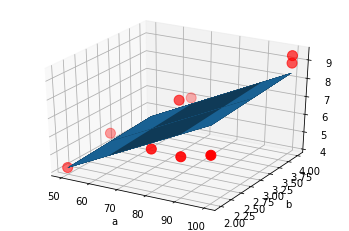

In [28]:
# 画图的思路
ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(x_data[:, 0], x_data[:, 1], y_data, c='r', marker = 'o', s =100)
x0 = x_data[:, 0]
x1 = x_data[:, 1]
# 生成网格矩阵
x0, x1 = np.meshgrid(x0, x1)
z = theta0 + theta1 * x0 + theta2 * x1
ax.plot_surface(x0, x1, z)
ax.set_xlabel('a')
ax.set_ylabel('b')
plt.show()